In [270]:
import pandas as pd
import numpy as np
import json
import tweepy
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import Requests
import Tweepy
%matplotlib inline

# 收集数据

In [271]:
#导入所需数据
#pandas提取twitter_archive_enhanced.csv
twitter_archive_enhanced = pd.read_csv('twitter_archive_enhanced.csv')

#Requests提取image-predictions.tsv
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

#Tweepy提取tweet_json
tweet_json = pd.read_json('tweet_json.txt',lines=True)

In [273]:
#tweet_json中仅取id，retweet_count和favorite_count
tweet_json = tweet_json[['id','retweet_count','favorite_count']]
tweet_json.columns = ['tweet_id','retweet_count','favorite_count']

# 评估数据

In [274]:
#设置列宽
pd.set_option('max_colwidth',200)

In [275]:
#建立副本
tae_df = twitter_archive_enhanced.copy()
im_df = image_predictions.copy()
tj_df = tweet_json.copy()

In [276]:
tae_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [277]:
tae_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [278]:
tae_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [279]:
tae_df.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/786709082849828864/photo/1                                                                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/809220051211603969/photo/1,https://twitter.com/dog_rates/status/809220051211603969/photo/1                                                                                                                                                                        2
https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1                                        2
https://www.gofundme.com/helpquinny,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://t

In [280]:
tae_df['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Buddy          7
Daisy          7
Bailey         7
Toby           7
Scout          6
Rusty          6
Leo            6
Koda           6
Dave           6
Stanley        6
Jax            6
Bella          6
Oscar          6
Jack           6
Milo           6
Alfie          5
            ... 
Chloe          1
Malikai        1
Glenn          1
Sojourner      1
Crimson        1
Leonidas       1
Tuco           1
Puff           1
Steve          1
Lilli          1
Arnold         1
Evy            1
Staniel        1
Schnozz        1
Socks          1
Jarvis         1
Opie           1
Dylan          1
Vince          1
Miley          1
Caryl          1
Sunshine       1
Ito            1
space          1
Ace            1
Juckson        1
Miguel         1
Gabby         

In [281]:
im_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [282]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [283]:
#jpg_url列重复数量
im_df.jpg_url.duplicated().sum()

66

In [284]:
tj_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [285]:
tj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### 质量问题

##### twitter_archive_enhanced表

- in_reply_to_status_id和in_reply_to_user_id存在数据缺失；
- retweeted_status_id，retweeted_status_user_id和retweeted_status_timestamp存在缺失；
- expanded_urls列存在缺失；
- expanded_urls中一列中同一种连接多次重复；
- rating_numerator中出现异常大的数，远大于位置在75%的数；
- rating_denominator均值和最大值都不为10，分母出现了大于10的数;
- name中有缺失且狗狗的名字有'a','the','an'明显名字有误；
- source列可只保留来源，删除链接地址；
- text列中存在RT开头的转发信息，应考虑删除；
- timestamp列格式有误；
- doggo,floorfer,pupper,puppo列有缺失；

##### image_predictions表

- jpg_url列有66条链接重复；

### 整洁度问题

##### twitter_archive_enhanced表

- doggo,floorfer,pupper,puppo四类可以合并为一列；
- 三表可按照id进行合并整理；

# 清理数据

#### 数据缺失

1.in_reply_to_status_id和in_reply_to_user_id存在数据缺失，做删除

In [286]:
tae_df = tae_df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

2.jpg_url列有66条链接重复，做删除

In [287]:
im_df = im_df[~im_df.jpg_url.duplicated()]

3.text列中存在RT开头的转发信息，应考虑删除

In [288]:
tae_df = tae_df[tae_df['retweeted_status_id'].isnull()]

4.retweeted_status_id，retweeted_status_user_id和retweeted_status_timestamp存在缺失，做删除

In [289]:
tae_df = tae_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

5.expanded_urls列存在缺失，做删除

In [290]:
tae_df = tae_df[tae_df.expanded_urls.notnull()]

In [291]:
tae_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


#### 整洁度

6.doggo,floorfer,pupper,puppo四类可以合并为一列

In [292]:
tae_df['category'] = tae_df['text'].str.lower().str.findall(r'doggo|floorfer|pupper|puppo')
tae_df['category'] = tae_df['category'].apply(lambda x:','.join(set(x)))
tae_df['category'] = tae_df['category'].replace('',np.nan)

In [293]:
tae_df['category'].value_counts()

pupper          248
doggo            80
puppo            28
pupper,doggo     10
doggo,puppo       2
Name: category, dtype: int64

7.三表可按照id进行合并整理

In [294]:
df = tae_df.merge(tj_df,how='left',on='tweet_id').merge(im_df,how='inner',on='tweet_id')

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 26 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
category              335 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null objec

#### 质量

8.rating_denominator均值和最大值都不为10，分母出现了大于10的数

In [296]:
#8,9问题可以综合考虑，如果分数确认无误，可以转换为分数进行计算
#可以先参看分母不为10的数据
df[df['rating_denominator']!=10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
323,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,...,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
385,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
662,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
800,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
848,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,...,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
891,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
925,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
946,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,...,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
970,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=

In [297]:
#合计18条，其中5条明显错误手动可修改；
df.loc[df['tweet_id']==666287406224695296,'rating_numerator']=9
df.loc[df['tweet_id']==666287406224695296,'rating_denominator']=10
df.loc[df['tweet_id']==740373189193256964,'rating_numerator']=14
df.loc[df['tweet_id']==740373189193256964,'rating_denominator']=10
df.loc[df['tweet_id']==682962037429899265,'rating_numerator']=10
df.loc[df['tweet_id']==682962037429899265,'rating_denominator']=10
df.loc[df['tweet_id']==722974582966214656,'rating_numerator']=13
df.loc[df['tweet_id']==722974582966214656,'rating_denominator']=10
df.loc[df['tweet_id']==716439118184652801,'rating_numerator']=11
df.loc[df['tweet_id']==716439118184652801,'rating_denominator']=10

In [298]:
#计算得分，用小数形式表示；
df['rating'] = df['rating_numerator']/df['rating_denominator']

In [299]:
#存在177.6和42两个过大的值
df['rating'].value_counts()

1.200000      454
1.000000      421
1.100000      403
1.300000      262
0.900000      152
0.800000       95
0.700000       51
1.400000       36
0.500000       33
0.600000       32
0.300000       19
0.400000       15
0.200000        9
0.100000        4
0.000000        2
177.600000      1
3.428571        1
2.600000        1
42.000000       1
7.500000        1
2.700000        1
Name: rating, dtype: int64

9.rating_numerator中出现异常大的数，远大于位置在75%的数

In [300]:
#有6个值得分大于了2，我们可以具体看看；
df[df['rating']>2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
385,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,...,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,3.428571
503,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,7.500000
553,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,...,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,2.700000
726,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,...,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,177.600000
1374,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,...,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,2.600000
1718,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,...,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,42.000000


In [301]:
#得分为2.6,2.7，7.5三列明显截取错误；
df.loc[df['tweet_id']==680494726643068929,'rating']=1.126
df.loc[df['tweet_id']==778027034220126208,'rating']=1.127
df.loc[df['tweet_id']==786709082849828864,'rating']=0.975

In [302]:
#另三个无截取错误，可能为记录时有误,我们初步手动修改为合理值；
df.loc[df['tweet_id']==670842764863651840,'rating'] = 0.42
df.loc[df['tweet_id']==749981277374128128,'rating'] = 1.776
df.loc[df['tweet_id']==810984652412424192,'rating'] = 24/70

10.timestamp列格式有误

In [303]:
df['timestamp'] = pd.to_datetime(df['timestamp'].str.split('+',expand=True)[0])

# 保存数据

In [304]:
#删除对分析无用的列source，expanded_urls和doggo,floorfer,pupper,puppo
df = df.drop(['source','expanded_urls','doggo','floofer','pupper','puppo'],axis=1)

In [305]:
df.to_csv('twitter_archive_master.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'twitter_archive_master.csv'

# 数据分析

### 问题：

1.哪种类型的狗狗是最受欢迎的？
2.哪种类型的狗狗评分最高？
3.评级越高，关注度就越高，受欢迎的人数是不是越多呢？

1.哪种类型的狗狗是最受欢迎的？

In [306]:
#将图片预测为狗狗的名字依次筛选出来
dog = []
for i in df.index:
    if df.loc[i].p1_dog==True:
        dog.append(df.loc[i].p1)
    elif (df.loc[i].p1_dog==False)&(df.loc[i].p2_dog==True):
        dog.append(df.loc[i].p2)
    elif (df.loc[i].p1_dog==False)&(df.loc[i].p2_dog==False)&(df.loc[i].p3_dog==True):
        dog.append(df.loc[i].p3)
    else:
        dog.append(np.nan)

In [307]:
#新增dog列，包含图片预测狗狗的名字并删除空值
df['dog'] = dog
df = df[df['dog'].notnull()]

In [308]:
#查看受欢迎人数在前五的狗狗
df.groupby('dog')['favorite_count'].sum().sort_values(ascending=False).head(5)

dog
golden_retriever      1956730
Labrador_retriever    1269771
Pembroke              1036321
Chihuahua              756715
Samoyed                582082
Name: favorite_count, dtype: int64

In [309]:
#查看转推数在前五的狗狗
df.groupby('dog')['retweet_count'].sum().sort_values(ascending=False).head(5)

dog
golden_retriever      590141
Labrador_retriever    405312
Pembroke              290602
Chihuahua             253916
Samoyed               202313
Name: retweet_count, dtype: int64

受欢迎数最多的狗狗前五依次是golden_retriever(金毛)，Labrador_retriever(拉布拉多)，Pembroke(柯基)，Chihuahua(吉娃娃)和Samoyed(萨摩耶)；而转推数最多依旧是这前五位，其中金毛人气最高；

2.哪种类型的狗狗评分最高？

In [310]:
#查看狗狗数量，点评分的总计、均值和极值
df.groupby('dog')['rating'].aggregate(['count',np.mean,sum,max,min]).sort_values(by=['count','mean','sum','max','min'],ascending=False)

,count,mean,sum,max,min
dog,,,,,
golden_retriever,158,1.150904,181.842857,1.400,0.342857
Labrador_retriever,108,1.119444,120.900000,1.400,0.700000
Pembroke,95,1.141053,108.400000,1.400,0.400000
Chihuahua,91,1.054945,96.000000,1.400,0.300000
pug,62,1.024194,63.500000,1.300,0.300000
toy_poodle,51,1.103922,56.300000,1.300,0.700000
chow,48,1.141667,54.800000,1.300,0.700000
Samoyed,42,1.169048,49.100000,1.400,0.700000
Pomeranian,42,1.092262,45.875000,1.400,0.600000


金毛的数量最多评分总计也是最大的，均值排在第11位，但就平均评价分进行排序而言，最高的为Bouvier_des_Flandres(波兰德斯布比野犬),均分为1.3分，但在整个表中仅1只同类犬

3.评级越高，关注度就越高，受欢迎的人数是不是越多呢？

In [311]:
df_relation = df[['favorite_count','rating']]

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


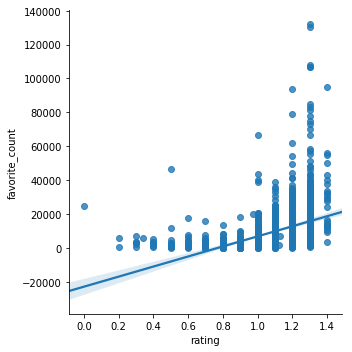

In [312]:
sns.lmplot('rating','favorite_count',data = df_relation)

从回归函数可以看出，评分大小和受欢迎程度呈正相关关系。排除大于1.5的异常值，在1.25至1.5之间的点赞人数达到峰值。

# 结论

狗狗的评分和狗狗的受欢迎是呈正相关关系狗狗，评价越高的狗狗自然也会受到更多推友的关注和点赞，评分对数据有影响（当然我们不能排除主人的拍照水平影响，这些没有在数据中体现）。我们还发现，实际上最受欢迎的狗狗都是人们饲养比例比较高的类型，比如金毛、拉布拉多，萨摩耶等，这些狗狗除了本身更受到人们的喜爱而饲养人群很多很多，在数据集中相较其他狗狗数量占比也更大，但评分结果参差不齐。

# 反思

客观上数据缺失，比如狗狗的分类约2/3的缺失，直接影响到了对这一列的使用；再者对图片的预测结果也有较大误差，很难注意检验数据是否准确；数据中存在极少部分的极端大评分，实际并无客观的错误，但考虑整体评分，最后在分析时可考虑删除这些评分。